# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [235]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [236]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [237]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [238]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [239]:
# Data Size
df.shape

(48842, 15)

In [240]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [241]:
# Inspeksi profile data
print("Profile data:")
df.info()

# Variabel dengan nilai hilang dan jumlahnya
missing_values = df.isnull().sum()
print("\nVariabel dengan nilai hilang dan jumlahnya:")
print(missing_values[missing_values > 0])

Profile data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB

Variabel dengan nilai hilang dan jumlahnya:
workclass         963
occupation  

## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [242]:
# Imputasi data hilang
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Cek data hilang setelah imputasi
missing_values_after = df.isnull().sum()
print("\nData hilang setelah imputasi: ")
print(missing_values_after[missing_values_after > 0])

# Inspeksi profile data
print("\nProfile data setelah imputasi:")
df.info()


Data hilang setelah imputasi: 
Series([], dtype: int64)

Profile data setelah imputasi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


/tmp/ipython-input-2483904575.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [243]:
kualitatif = df.select_dtypes(include=['object']).columns

print("Inspeksi fitur kualitatif: ")
# Menampilkan unique value setiap kolom
for col in kualitatif:
    print(f"Kolom: {col}")
    print(df[col].unique())
    print("-"*80)

# Normalisasi awal: hapus spasi & seragamkan huruf
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].str.strip()

# Mapping perbaikan manual
replace_dict = {
    'workclass': {
        '?': 'others'
    },
    'occupation': {
        '?': 'others'
    },
    'native-country': {
        '?': 'others',
        'Holand-Netherlands': 'Netherlands',
        'Trinadad&Tobago': 'Trinidad&Tobago',
        'South': 'South Korea',
        'Hong': 'Hong Kong'
    },
    'income': {
        '<=50K.': '<=50K',
        '>50K.': '>50K'
    }
}

# Terapkan perbaikan
for col, mapping in replace_dict.items():
    if col in df.columns:
        df[col] = df[col].replace(mapping)

# Inspeksi ulang hasil akhir
print("\nInspeksi fitur kualitatif setelah perbaikan: ")
for col in categorical_cols:
    print(f"Kolom: {col}")
    print(df[col].unique())
    print("-"*80)

Inspeksi fitur kualitatif: 
Kolom: workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
--------------------------------------------------------------------------------
Kolom: education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
--------------------------------------------------------------------------------
Kolom: marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
--------------------------------------------------------------------------------
Kolom: occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
--------

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

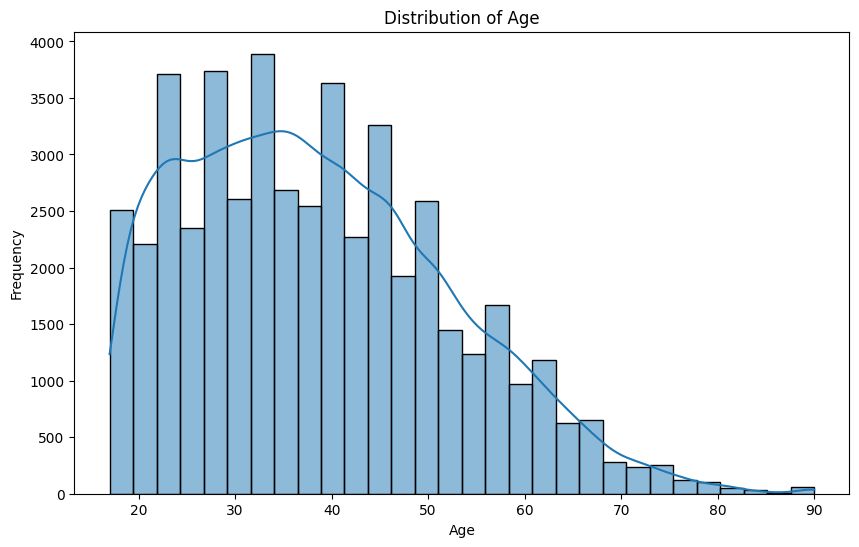

In [244]:
# 1.1 Histogram pada kolom 'age'
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

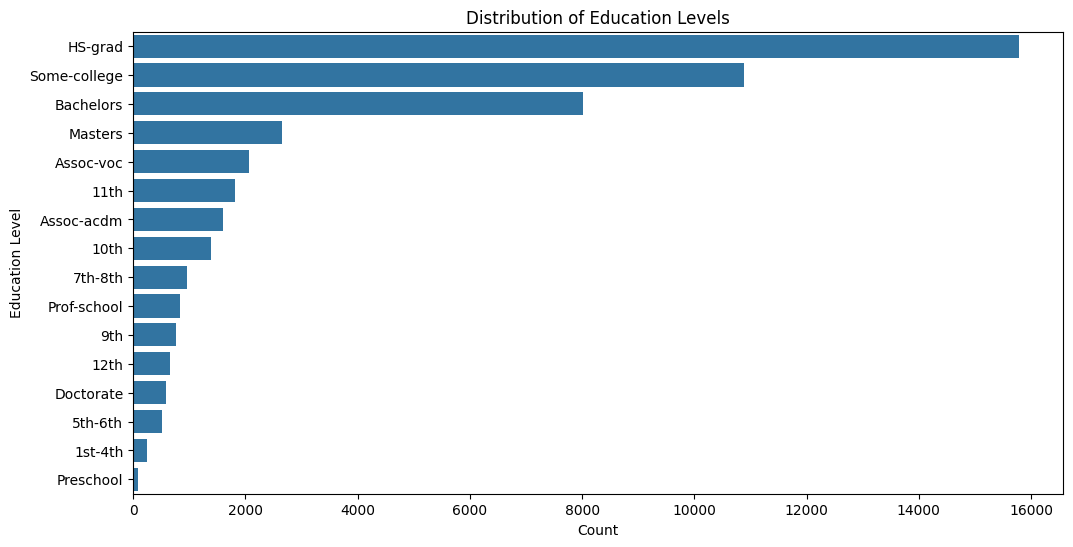

In [245]:
# 1.2 Bar Chart pada kolom 'education'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='education', order=df['education'].value_counts().index)
plt.title('Distribution of Education Levels')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

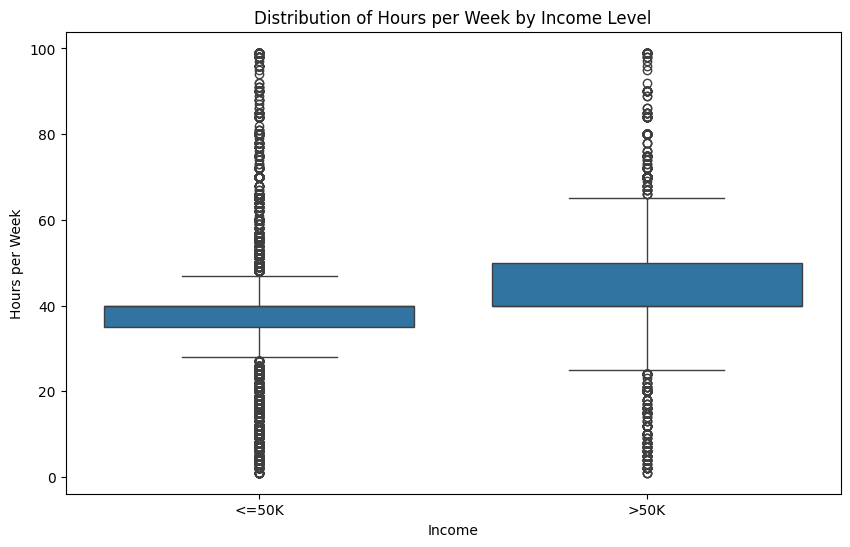

In [246]:
# 3. Boxplot pada kolom 'income' terhadap 'hours-per-week'
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Distribution of Hours per Week by Income Level')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

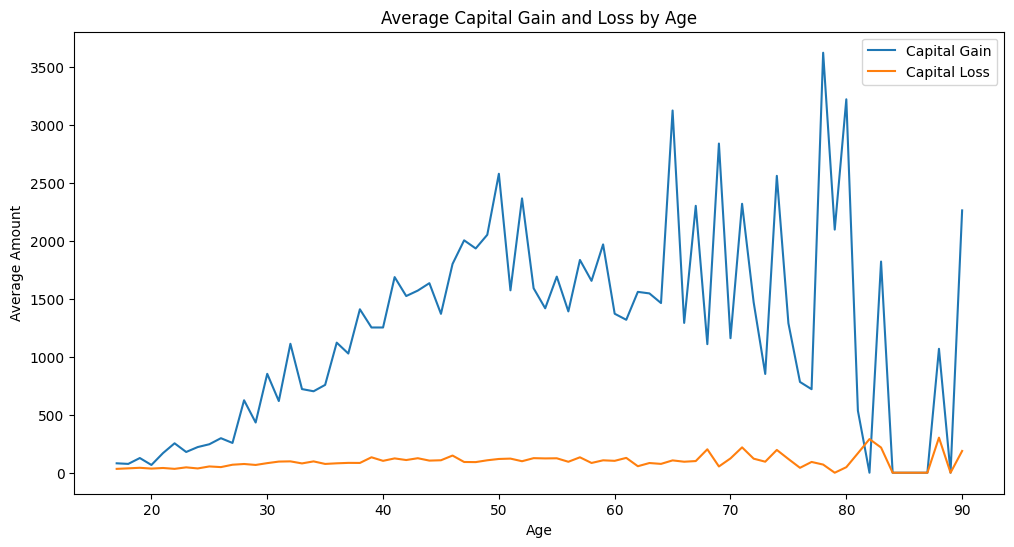

In [247]:
# Agregasi data berdasarkan usia untuk menghitung rata-rata capital-gain dan capital-loss
age_capital = df.groupby('age')[['capital-gain', 'capital-loss']].mean().reset_index()

# 1.4 Lineplot pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss'
plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='capital-gain', data=age_capital, label='Capital Gain')
sns.lineplot(x='age', y='capital-loss', data=age_capital, label='Capital Loss')
plt.title('Average Capital Gain and Loss by Age')
plt.xlabel('Age')
plt.ylabel('Average Amount')
plt.legend()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [248]:
'''
1. Terjadi distribusi usia yang tidak simetris yaitu right skewed. Hal ini berarti lebih banyak orang
di kelompok umur 20-40 tahun, namun terjadi penurunan jumlah orang secara tajam setelah usia 50.

2. Jika terdapat data yang hilang pada variabel 'age', strategi yang lebih tepat digunakan adalah
melakukan imputasi menggunakan median. Hal ini dipertimbangkan berdasarkan hasil distribusi right skewed
pada 'age', median lebih stabil dibandingkan mean karena median tidak terpengaruh oleh adanya outlier.
'''

# Menghitung jumlah outlier pada 'income'
import pandas as pd

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

outliers_count = df.groupby('income')['hours-per-week'].apply(count_outliers)
print(outliers_count)

'''
3. Jumlah outlier pada kategori 'income' adalah: untuk income <=50K sebanyak 11706, sedangkan untuk income >50K sebanyak 781.
Yang paling banyak memiliki outlier adalah kategori income <=50K.
'''

income
<=50K    11706
>50K       781
Name: hours-per-week, dtype: int64


"\n3. Jumlah outlier pada kategori 'income' adalah: untuk income <=50K sebanyak 11706, sedangkan untuk income >50K sebanyak 781.\nYang paling banyak memiliki outlier adalah kategori income <=50K.\n"

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [249]:
# ---  Encoding fitur 'sex' ---
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
print("=== Hasil Setelah Encoding 'sex' ===")
print(df[['sex']].head(), "\n")

# ---  Encoding fitur 'income' ---
df['income'] = df['income'].map({'<=50K': 1, '>50K': 0})
print("=== Hasil Setelah Encoding 'income' ===")
print(df[['income']].head(), "\n")

=== Hasil Setelah Encoding 'sex' ===
   sex
0    1
1    1
2    1
3    1
4    0 

=== Hasil Setelah Encoding 'income' ===
   income
0       1
1       1
2       1
3       1
4       1 



# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

Matriks Korelasi:


,age,education-num,hours-per-week,capital-gain,capital-loss,income
age,1.000000,0.030940,0.071558,0.077229,0.056944,-0.230369
education-num,0.030940,1.000000,0.143689,0.125146,0.080972,-0.332613
hours-per-week,0.071558,0.143689,1.000000,0.082157,0.054467,-0.227687
capital-gain,0.077229,0.125146,0.082157,1.000000,-0.031441,-0.223013
capital-loss,0.056944,0.080972,0.054467,-0.031441,1.000000,-0.147554
income,-0.230369,-0.332613,-0.227687,-0.223013,-0.147554,1.000000


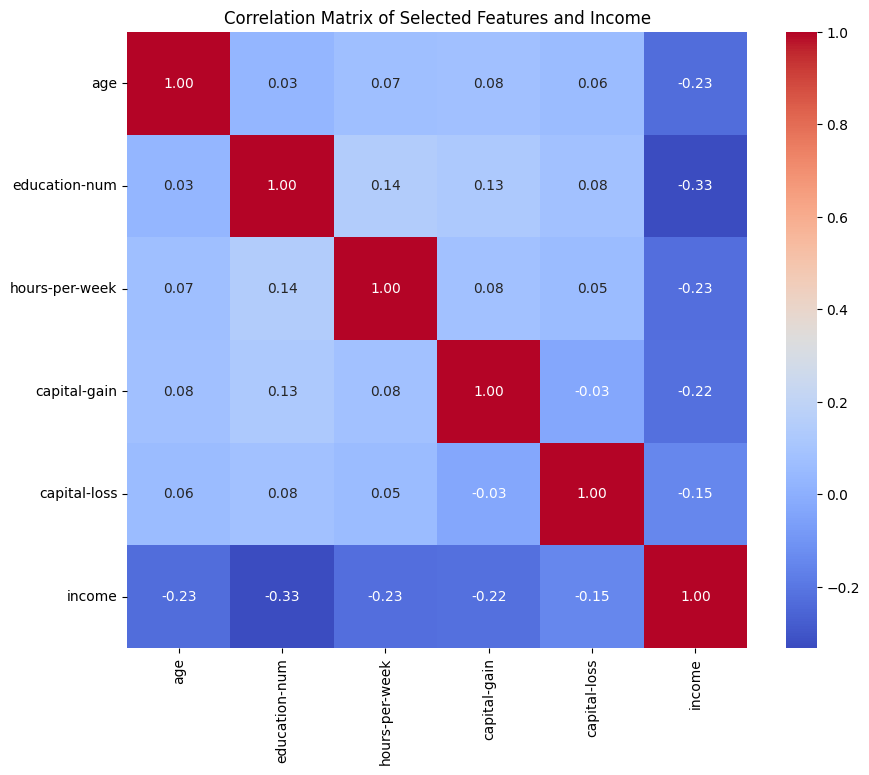

In [250]:
# Soal 4.1
selected_cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
correlation_matrix = df[selected_cols].corr()

print("Matriks Korelasi:")
display(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features and Income')
plt.show()

In [251]:
# Soal 4.2
'''
Semua fitur memiliki korelasi negatif dengan income. education-num adalah faktor yang paling berpengaruh pada income.
education-num cukup berkorelasi dengan hours-per-week (0.14) dan capital-gain (0.13).
capital-gain dan capital-loss hampir tidak berkorelasi (-0.03), artinya distribusinya independen.
'''

'\nSemua fitur memiliki korelasi negatif dengan income. education-num adalah faktor yang paling berpengaruh pada income.\neducation-num cukup berkorelasi dengan hours-per-week (0.14) dan capital-gain (0.13).\ncapital-gain dan capital-loss hampir tidak berkorelasi (-0.03), artinya distribusinya independen.\n'

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [252]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


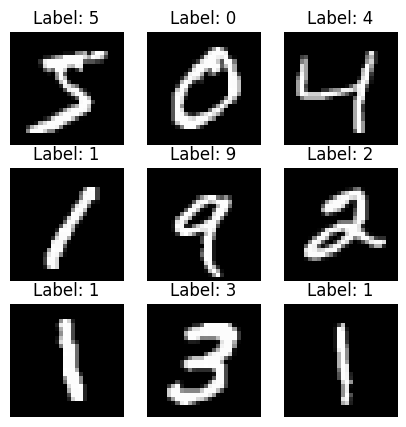

In [253]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Shape dari upsampling gambar: (10000, 32, 32)


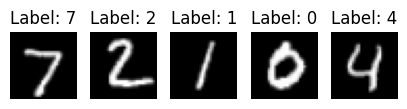

In [254]:
#  Soal 5.1 Melakukan upsampling citra menjadi 32x32
import cv2

X_test_upsampled = np.empty((X_test.shape[0], 32, 32), dtype=np.float32)
for i in range(X_test.shape[0]):
    X_test_upsampled[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_LINEAR)

print("Shape dari upsampling gambar:", X_test_upsampled.shape)

# Soal 5.2 Menampilkan 5 data hasil proses upsampling
plt.figure(figsize=(5,5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test_upsampled[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [255]:
X_test_normalized = X_test_upsampled / 255.0

print("Shape dari normalisasi gambar:", X_test_normalized.shape)

Shape dari normalisasi gambar: (10000, 32, 32)


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [256]:
X_test_flattened = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

print("Shape dari flattened gambar:", X_test_flattened.shape)

Shape dari flattened gambar: (10000, 1024)
